<a href="https://colab.research.google.com/github/A1171/ColabNotebooks/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B0_%D1%87%D0%B5%D1%80%D0%B5%D0%B7_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

In [2]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [5]:
#Подготовим матрицу для расчета векторов u, s, vh
svdMatr=np.matmul(np.transpose(x_train),x_train)/len(x_train)

In [7]:
#Посчитаем вектора с помощью функции из библиотеки numpy
u, s, vh = np.linalg.svd(svdMatr, full_matrices=True)
print(u.shape, s.shape, vh.shape)

(784, 784) (784,) (784, 784)


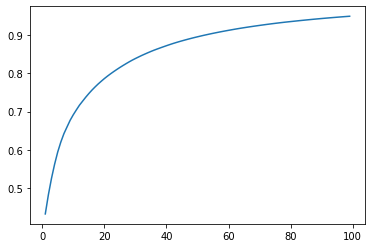

In [24]:
#График точности декомпозиции от количества компонент
plt.plot(np.arange(100)[1:],np.array([sum(s[:NComp])/sum(s) for NComp in range(1,100)]))#Нарисуем график точности декомпозиции от количества компонени

In [25]:
SelectetPrecision=0.01;#Выберем потери при декомпозиции <= 1%
SummS=sum(s)#Суммарная энтропия
CurrentSumm=0;#Суммируем компоненты матрицы пока не достигнем потерь <1%
SelectedFeaturesNum=-1;#Выбранный размер декомпозиции
LostPrecision=0
for i in range(len(s)):
  if SelectedFeaturesNum==-1:
    CurrentSumm=CurrentSumm+s[i]
    CalculatedPrecision=1-CurrentSumm/SummS
  else:
    LostPrecision+=s[i]

  if CalculatedPrecision<=SelectetPrecision and SelectedFeaturesNum==-1:#Достигнута заданная точность декомпозиции Фиксируем кооличество компонент
    SelectedFeaturesNum=i;
if SelectedFeaturesNum==0 or SelectedFeaturesNum==-1:
  SelectedFeaturesNum=s.shape[0]
uReduse=u[:,0:SelectedFeaturesNum]#Выбранная матрица для декомпозиции
print("Выбранный размер вектора декомпозиции:",SelectedFeaturesNum)
print("Потеря энтропии:",LostPrecision,"от ",SummS)


Выбранный размер декомпозиции: 280
Потеря энтропии: 0.8716304937319519 от  87.81001462246621


Пример снижения размерности и восстановления картинки

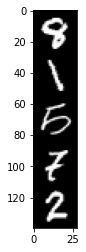

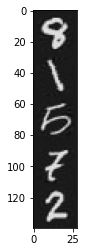

In [42]:
#Прямое преобразование на примере тренировочного датасета
RandomImages=np.random.randint(0,len(x_train),5)
plt.imshow(x_train[RandomImages].reshape(140,28), cmap='gray')
plt.show()
TestReduseZ=np.transpose(np.matmul(np.transpose(uReduse),np.transpose(x_train)))
#Обратное преобразование на примере тренировочного датасета
TestReduseXRecover=np.transpose(np.matmul(uReduse,np.transpose(TestReduseZ)))
plt.imshow(TestReduseXRecover[RandomImages].reshape(140,28), cmap='gray')
plt.show()


Тренируем две нейросети и тестируем предсказание для датасета без снижения размерности и на датасете со снижением размерности.

In [27]:
CLASS_COUNT = 10
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [43]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 800)               628000    
                                                                 
 dense_4 (Dense)             (None, 400)               320400    
                                                                 
 dense_5 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          validation_data=(x_test,y_test),
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 10s 20ms/step - loss: 0.2091 - accuracy: 0.9376 - val_loss: 0.0957 - val_accuracy: 0.9697
Epoch 2/15
469/469 [==============================] - 10s 21ms/step - loss: 0.0759 - accuracy: 0.9766 - val_loss: 0.0820 - val_accuracy: 0.9752
Epoch 3/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0514 - accuracy: 0.9829 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 4/15
469/469 [==============================] - 10s 20ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0702 - val_accuracy: 0.9799
Epoch 5/15
469/469 [==============================] - 10s 22ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 6/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0757 - val_accuracy: 0.9787
Epoch 7/15
469/469 [==============================] - 10s 21ms/step - loss: 0.0177 - accuracy: 0.9939 - val_loss: 0.0774 - val_accuracy: 

точность 98.42%

In [46]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=uReduse.shape[1], activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 800)               224800    
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dense_11 (Dense)            (None, 10)                4010      
                                                                 
Total params: 549,210
Trainable params: 549,210
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model.fit(np.transpose(np.matmul(np.transpose(uReduse),np.transpose(x_train))),        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          validation_data=(np.transpose(np.matmul(np.transpose(uReduse),np.transpose(x_test))),y_test),
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 8s 16ms/step - loss: 0.2139 - accuracy: 0.9390 - val_loss: 0.1036 - val_accuracy: 0.9684
Epoch 2/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.0749 - val_accuracy: 0.9771
Epoch 3/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0744 - val_accuracy: 0.9767
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0812 - val_accuracy: 0.9782
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0943 - val_accuracy: 0.9763
Epoch 6/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0922 - val_accuracy: 0.9758
Epoch 7/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0944 - val_accuracy: 0.9783

Точность 97.66%

In [48]:
784/uReduse.shape[1]

2.8

Получили что при снижении размерности вектора в 2.8раза получаем снижение точности предсказания на 0.76% .  В некоторых случаях это может быть существенно в некоторых не существенно.